# Exercise 10: Hierarchical clustering of the grain data

In the video, you learnt that the SciPy `linkage()` function performs hierarchical clustering on an array of samples.  Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.  A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.


**Step 1:** Import:

 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.
 + `pandas`
 + `load_iris` and `train_test_split`

In [60]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt


**Step 2:** Load the dataset _(done for you)_.

In [61]:

iris_data = load_iris()


In [62]:
#Create pd DF the same way you did the first day
#Create the class and target columns and remove de cm from the columns names

def create_df():
    df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
    df["target"] = iris_data.target
    df["class"] = iris_data.target_names[iris_data.target]
    df.columns = [col.replace("(cm)", "").strip() for col in df.columns]
    return df
df_iris = create_df()
df_iris.sample(n=10)

,sepal length,sepal width,petal length,petal width,target,class
127,6.1,3.0,4.9,1.8,2,virginica
36,5.5,3.5,1.3,0.2,0,setosa
146,6.3,2.5,5.0,1.9,2,virginica
139,6.9,3.1,5.4,2.1,2,virginica
11,4.8,3.4,1.6,0.2,0,setosa
15,5.7,4.4,1.5,0.4,0,setosa
58,6.6,2.9,4.6,1.3,1,versicolor
49,5.0,3.3,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
95,5.7,3.0,4.2,1.2,1,versicolor


In [63]:
assert df_iris['sepal length'].shape == (150,)
assert df_iris['sepal width'].shape == (150,)
assert df_iris['petal length'].shape == (150,)
assert df_iris['petal width'].shape == (150,)
assert df_iris['target'].shape == (150,)
assert df_iris['class'].shape == (150,)

In [64]:

#From our data we will only get variable columns as np.array
x = 0
x = df_iris[['sepal length','sepal width','petal length','petal width']].to_numpy()
print(x.shape)

#or

#x_iloc = df_iris.iloc[:,:4].to_numpy()
#print(x_iloc)

(150, 4)


In [65]:
assert x.shape == (150,4)

**Step 3:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='complete'` keyword argument. Assign the result to `mergings`.

In [66]:
mergings = 0 
mergings = linkage(x,'complete')

In [67]:
assert mergings.shape == (149,4)

**Step 4:** Plot a dendrogram using the `dendrogram()` function on `mergings`, specifying the keyword arguments `labels=varieties`, `leaf_rotation=90`, and `leaf_font_size=6`.  Remember to call `plt.show()` afterwards, to display your plot.

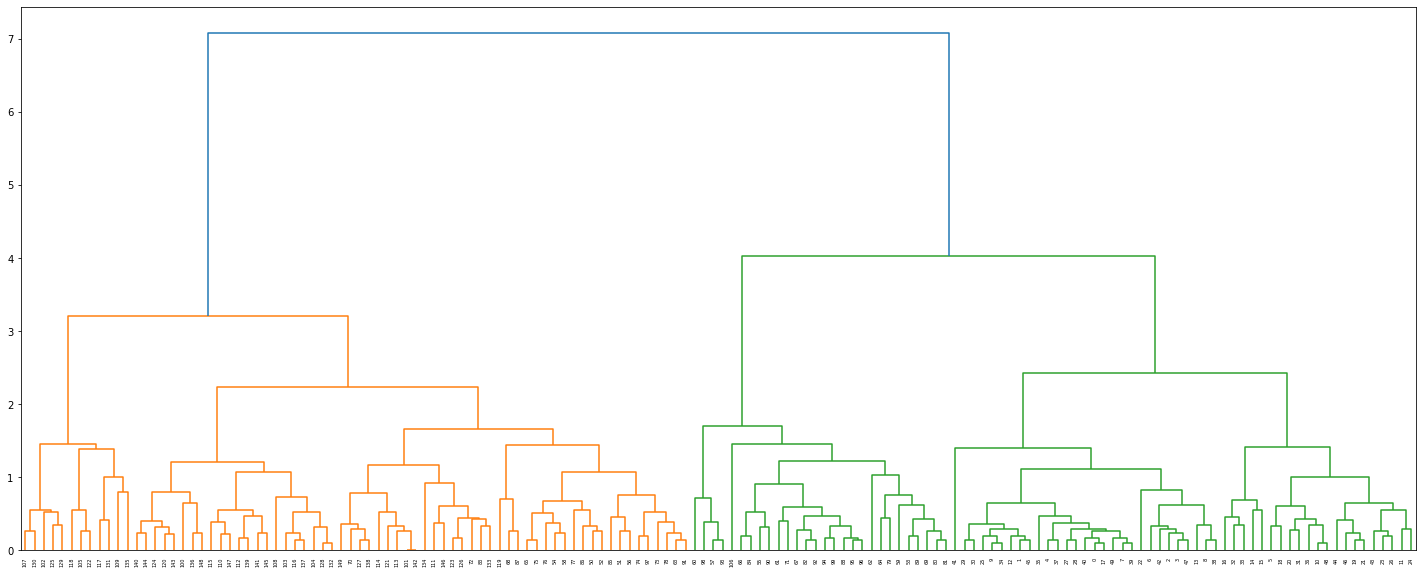

In [68]:
dn = 0
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(mergings)
plt.show()



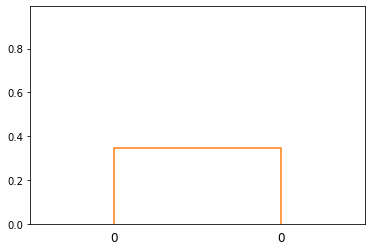

In [69]:
assert type(dn) == type(dendrogram(np.random.rand(15, 4)))

## K-MEANS

for this next part we will use the K-Means algorithm in order to cluster your data

**Step 1:** 
+ import `KMeans` from `sklearn.cluster`
+ loading our new datasets

In [70]:
from sklearn.cluster import KMeans

df = pd.read_csv('./datasets/ch1ex1.csv')
points = df.values

new_df = pd.read_csv('./datasets/ch1ex2.csv')
new_points = new_df.values


**Step 2:** Using `KMeans()`, create a `KMeans` instance called `model` to find `3` clusters. To specify the number of clusters, use the `n_clusters` keyword argument


In [71]:
model = 0
model = model = KMeans(n_clusters=3)


In [72]:
assert type(model)== type(KMeans())

**Step 4:** Use the `.fit()` method of `model` to fit the model to the array of points `points`.

In [73]:

model.fit(points)

KMeans(n_clusters=3)

**Step 5:** Use the `.predict()` method of `model` to predict the cluster labels of `points`, assigning the result to `labels`.

In [74]:
labels = model.predict(points)
labels

array([2, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0, 2, 2, 0, 2, 2, 1, 0, 0,
       0, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 1, 1, 0,
       1, 0, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 1, 2, 0, 1, 0, 0, 0, 0, 2,
       2, 1, 0, 1, 0, 2, 2, 2, 1, 0, 0, 1, 0, 2, 0, 1, 2, 1, 1, 1, 0, 0,
       2, 0, 1, 0, 0, 0, 2, 0, 1, 1, 2, 2, 2, 2, 2, 0, 1, 2, 0, 0, 1, 1,
       0, 2, 0, 2, 1, 0, 1, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 0,
       1, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 0, 2,
       1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 0, 1, 2, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 2, 0, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0,
       0, 0, 0, 1, 1, 1, 2, 2, 0, 2, 1, 0, 2, 2, 0, 2, 1, 1, 1, 1, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2, 1, 2, 0, 2, 1, 1, 1,
       1, 1, 2, 2, 0, 2, 2, 0, 1, 1, 0, 2, 1, 1, 0, 0, 2, 2, 2, 0, 0, 2,
       1, 0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0], d

In [75]:
assert labels[labels.argmax()] == 2
assert labels.shape == (300,)

In [76]:
# Make a function that returns 3 numpy arrays each one with the points associated for each class
#If the label is 0 they go into data_0
#If the label is 1 they go into data_1
#If the label is 2 they go into data_2
def separate_labels(labels, points):
    data_0 = []
    data_1 = []
    data_2 = []
    for i in range(labels.shape[0]):
        if labels[i] == 0:
            data_0.append(points[i]) 
        elif labels[i] == 1:
            data_1.append(points[i]) 
        else:
            data_2.append(points[i]) 
    # YOUR CODE HERE
    return np.array(data_0),np.array(data_1),np.array(data_2)
   

    
data_0,data_1,data_2 =separate_labels(labels, points)

print(data_0.shape)
print(data_1.shape)
print(data_2.shape)

(95, 2)
(94, 2)
(111, 2)


In [77]:
assert abs(data_0.shape[0] - 94) <= 20
assert abs(data_1.shape[0] - 95) <= 20
assert abs(data_2.shape[0] - 111) <= 20

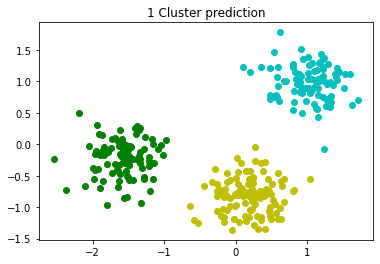

In [78]:
# plotting the data 
plt.scatter(data_0[:,0],data_0[:,1], c = "g")
plt.scatter(data_1[:,0],data_1[:,1], c = "c")
plt.scatter(data_2[:,0],data_2[:,1], c = "y")
plt.title('1 Cluster prediction')
plt.show()
# YOUR CODE HERE

**Step 7:** Use the `.predict()` method of `model` to predict the cluster labels of `new_points`, assigning the result to `new_labels`.  Notice that KMeans can assign previously unseen points to the clusters it has already found!

In [79]:

# YOUR CODE HERE
new_labels = model.predict(new_points)
new_labels



array([1, 1, 0, 0, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       0, 1, 0, 2, 0, 1, 1, 1, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 2,
       0, 0, 2, 1, 0, 0, 1, 1, 2, 1, 2, 1, 0, 1, 0, 0, 0, 2, 2, 2, 0, 0,
       2, 0, 2, 0, 1, 1, 1, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 0, 2, 0], dtype=int32)

In [80]:
assert new_labels[new_labels.argmax()] == 2
assert new_labels.shape == (100,)

In [83]:
#separate the data by labels like we did before


new_0 = []
new_1 = []
new_2 = []

new_0, new_1, new_2 = separate_labels(new_labels, new_points)
abs(new_0.shape[0])
abs(new_1.shape[0])
abs(new_2.shape[0]) 




32

In [84]:
assert abs(new_0.shape[0] - 34) <= 5
assert abs(new_1.shape[0] - 34) <= 5
assert abs(new_2.shape[0] - 34) <= 5

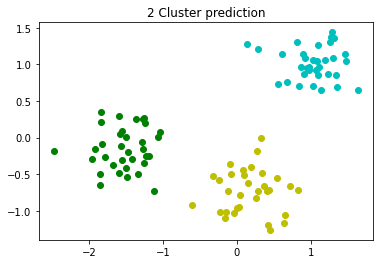

In [85]:
#plot the new labels

plt.scatter(new_0[:,0],new_0[:,1], c = "g")
plt.scatter(new_1[:,0],new_1[:,1], c = "c")
plt.scatter(new_2[:,0],new_2[:,1], c = "y")
plt.title('2 Cluster prediction')
plt.show()


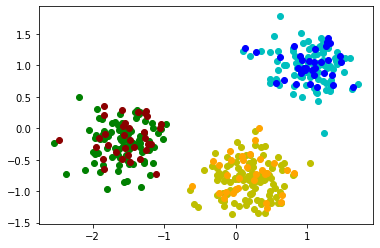

In [86]:
#plot all the points together
plt.scatter(data_0[:,0],data_0[:,1], c = "g")
plt.scatter(data_1[:,0],data_1[:,1], c = "c")
plt.scatter(data_2[:,0],data_2[:,1], c = "y")
plt.scatter(new_0[:,0],new_0[:,1], c = "darkred")
plt.scatter(new_1[:,0],new_1[:,1], c = "b")
plt.scatter(new_2[:,0],new_2[:,1], c = "orange")
plt.show()
